## Machine Learning - Ex.4


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skmet

### Multi class classification 

In this exercise we will try to learn the DIGITS dataset. 
The dataset contains almost 2000 examples of hand written digits:
$$y_i\in\{0,1,2,...,9\}$$
each sample is represented by a 64 features vector (bitmap of 8x8 pixels):
$$x_i\in R^{64}$$



(1797, 64)
(1797,)


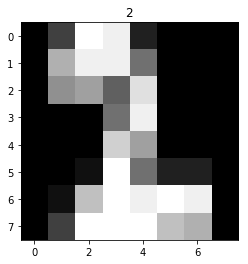

In [2]:
from sklearn import datasets
digits = datasets.load_digits() # load the dataset
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)


i = 1437;
plt.imshow(X[i,:].reshape(8,8),interpolation='nearest',cmap='gray')
plt.title(y[i])
plt.show()

### Classify '1' against the rest 

Use logistic regression to learn a classifier for the digit of '1' (y=1). Any other digits, should be classified by this model as '0'.

Learn the model on 80% of the data and test it on the rest of the 20%. 

Count how many training examples and how many testing examples the model identified correctly and wrongly.

Plot a few examples for each case (wrongly vs. correctly).

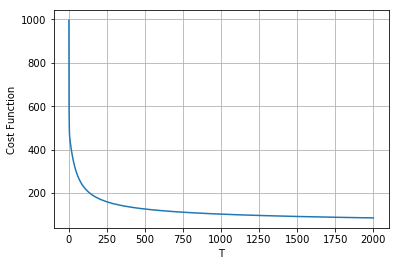

test correctly classified  23.0
test wrongly classified  17.0
training correctly classified  129.0
training wrongly classified  28.0
training correctly examples


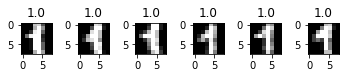

training wrongly examples


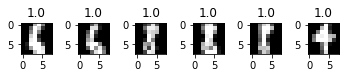

test correctly examples


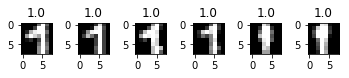

test wrongly examples


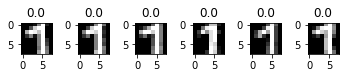

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def g(x,w):
    return sigmoid(np.dot(x,w))
def convertYToYBinary(y):
    y_binary = np.zeros(y.shape[0])
    for i in range(0,y.shape[0]):
        if(y[i] == 1):
             y_binary[i] = 1
    return y_binary
def classifiyAndCountResults(data,y_true,w,dataName):
    y_real = convertYToYBinary(y_true)
    y_hat = singleClassifier(data,w)
    y_correct_classified = y_hat * y_real
    print(dataName,"correctly classified ", np.sum(y_correct_classified))
    y_wrongly_classified = y_hat + y_real
    for i in range(0,y_wrongly_classified.shape[0]):
        if(y_wrongly_classified[i] == 2):
            y_wrongly_classified[i] = 0
    print(dataName,"wrongly classified ", np.sum(y_wrongly_classified))
    return y_correct_classified,y_wrongly_classified,y_hat
def plotExamples(data,y_val,y,matchBy,info):
    items = np.where(y_val==matchBy)[0]
    lnc = 6
    print(info[0],info[1])
    for i in range(0,lnc):
        plt.subplot(lnc,lnc,i+1)
        j = items[i]
        plt.imshow(data[j,:].reshape(8,8),interpolation='nearest',cmap='gray')
        plt.title(y[j])
    plt.show()
def plotCorrectlyVsWrongly(data,y_true,y_false,y,dataName):
    plotExamples(data,y_true,y,1,(dataName,"correctly examples"))
    plotExamples(data,y_false,y,1,(dataName,"wrongly examples"))
    
def singleClassifier(X,w):
    y_hat = np.zeros(X.shape[0])
    for i in range(0,X.shape[0]):
        y_hat[i] = classfier(X[i],w)
    return y_hat
def classfier(x,w):
    if(g(x,w) >= 0.5):
        return 1
    return 0
def J_cost(X,y,w):
    #z = X.dot(w)
    h = g(X,w)#1/(1+np.exp(-z))
    temp = -1*(1-y)*np.log(1-h)-y*np.log(h)
    return np.mean(np.sum(temp))
def gradient_descent(X, y, alpha=0.01, T=100):
    J = np.zeros(T) # to hold the cost function value J at each iteration
    N,d = X.shape
    w = np.zeros(d)
    X_TRANS = X.T
    R = X_TRANS.dot(y)
    for i in range(T):
        J[i] = J_cost(X,y,w)
        #z = X.dot(w)
        #h = 1/(1+np.exp(-z))
        #temp = h.dot(X)
        temp = g(X,w).dot(X)
        w = w -alpha*((temp-R)/N)
    return w, J

des_m = np.concatenate((np.ones((X.shape[0],1)),X),axis=1);
rowsCount = (int)(0.8*des_m.shape[0])
train_m = des_m[range(0,rowsCount), :]
test_m = des_m[range(rowsCount,des_m.shape[0]), :]
train_y = convertYToYBinary(y[range(0,rowsCount)])
T = 2000
wResult,Jcost = gradient_descent(train_m,train_y,0.001,T)

space = np.linspace(1,T,T)
plt.plot(space,Jcost)
plt.xlabel('T')
plt.ylabel('Cost Function')
plt.grid()
plt.show()

tstCorrectly,tstWrongly,tst_y_hat = classifiyAndCountResults(test_m,y[range(rowsCount,des_m.shape[0])],wResult,"test")


trainingCorrectly,trainingWrongly,train_y_hat = classifiyAndCountResults(train_m,y[range(0,rowsCount)],wResult,"training")

plotCorrectlyVsWrongly(X[range(0,rowsCount),:],trainingCorrectly,trainingWrongly,train_y_hat,"training")
plotCorrectlyVsWrongly(X[range(rowsCount,des_m.shape[0]),:],tstCorrectly,tstWrongly,tst_y_hat,"test")



#======= Counting
#test_y = np.zeros(des_m.shape[0] - rowsCount)
#for i in range(rowsCount,des_m.shape[0]):
 #   if(y[i] == 1):
  #      test_y[i - rowsCount] = 1
#classified_test_y = np.zeros(des_m.shape[0] - rowsCount)
#for i in range(rowsCount,des_m.shape[0]):
 #   if(y[i] == 1):
  #      classified_test_y[i - rowsCount] = classfier(test_m[i - rowsCount],wResult)
#classified_train_y = np.zeros(rowsCount)
#for i in range(0,rowsCount):
 #   if(y[i] == 1):
  #      classified_train_y[i] = classfier(train_m[i],wResult)
#oneMatchTrain = train_y * classified_train_y
#oneMatchTest = test_y * classified_test_y
#YesOneTest=np.sum(oneMatchTest)
#notOneTest=des_m.shape[0] - rowsCount-YesOneTest
#YesOneTrain = np.sum(oneMatchTrain)
#notOneTrain = des_m.shape[0] -rowsCount-YesOneTrain
#print("Found ones in test: ",YesOneTest," All others in test: ", notOneTest)
#print("Found ones in training: ",YesOneTrain," All others in training: ", notOneTrain)

#Examples..
#itemindex = np.where(oneMatchTest==1)
#print("From tests(correctly):")
#for i in range(0,5):
 #   plt.subplot(6,6,i+1)
  #  i = itemindex[0][i]
   # plt.imshow(X[range(rowsCount,des_m.shape[0]),:][i,:].reshape(8,8),interpolation='nearest',cmap='gray')
   # plt.title(oneMatchTest[i])
#plt.show()

#itemindex = np.where(oneMatchTest==0)    
#print("From tests(wrongly):")
#for i in range(0,5):
 #   i = itemindex[0][i]
  #  plt.imshow(X[range(rowsCount,des_m.shape[0]),:][i,:].reshape(8,8),interpolation='nearest',cmap='gray')
   # plt.title(oneMatchTest[i])
    #plt.show()

    
    #Examples..
#itemindex = np.where(oneMatchTrain==1)
#print("From training(correctly):")
#for i in range(0,5):
 #   plt.subplot(6,6,i+1)
  #  i = itemindex[0][i]
   # plt.imshow(X[range(0,rowsCount),:][i,:].reshape(8,8),interpolation='nearest',cmap='gray')
    #plt.title(oneMatchTrain[i])
    #plt.show()

#itemindex = np.where(oneMatchTrain==0)    
#print("From training(wrongly):")
#for i in range(0,5):
 #   plt.subplot(6,6,i+1)
  #  i = itemindex[0][i]
  #  plt.imshow(X[range(0,rowsCount),:][i,:].reshape(8,8),interpolation='nearest',cmap='gray')
   # plt.title(oneMatchTrain[i])
    #plt.show()


### Classify '2' against the rest, and so on..


Continue and learn one classifier for each of the digits (0-9). Make sure that your algorithm converged in each one of them.

Now that you have 10 binary classifiers, one for each digit, lets use them as a multi-class classifier. The multi-class classifier will return $y_i\in\{0,1,2,...,9\}$ corresponding to the binary classifier with the highest output.

Summarize your results on the (80%) training data and on the (20%) testing data using a *confusion matrix* $M$.

Where $M_{i,j}$ counts how many examples with true label $y=i$ were classified as $j$.

see also: <https://en.wikipedia.org/wiki/Confusion_matrix>

training... 10 %
training... 20 %
training... 30 %
training... 40 %
training... 50 %
training... 60 %
training... 70 %
training... 80 %
training... 90 %
training... 100 %


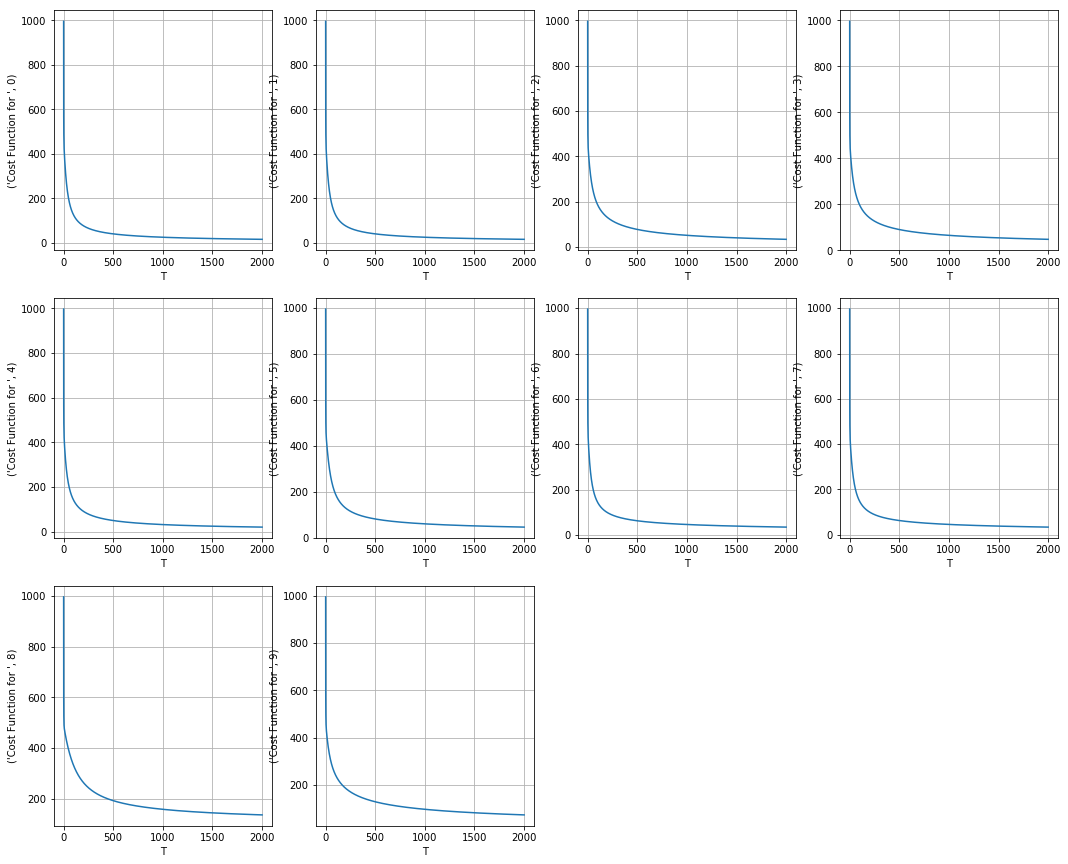

Test data confusion matrix
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 26  0  1  0  0  0  0  2  7]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  2  0 24  0  3  0  3  5  0]
 [ 0  0  0  0 34  0  0  0  3  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  2  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 34  1  0]
 [ 0  1  0  0  0  2  0  0 28  2]
 [ 1  0  0  1  0  2  0  0  2 31]]
Training data confusion matrix
[[143   0   0   0   0   0   0   0   0   0]
 [  0 141   0   0   0   1   1   0   2   1]
 [  0   0 142   0   0   0   0   0   0   0]
 [  0   1   0 139   0   1   0   1   3   1]
 [  0   0   0   0 142   0   0   1   0   1]
 [  1   0   0   0   1 139   1   0   0   3]
 [  0   2   0   0   1   0 140   0   1   0]
 [  0   0   0   0   0   0   0 142   0   1]
 [  0   5   0   0   0   1   1   0 133   1]
 [  0   1   0   1   0   0   0   0   3 138]]


In [4]:
def trainall():
    results = []
    costs = []
    for k in range(0,10):
        if(k != 1):
            t_y = np.zeros(rowsCount)
            for i in range(0,rowsCount):
                if(y[i] == k):
                    t_y[i] = 1
            T = 2000
            wkResult,Jcost = gradient_descent(train_m,t_y,0.001,T)
            results += [wkResult]
            costs+= [Jcost]
        else:
            costs+= [Jcost]
            results += [wResult]
        print("training...",(k+1)*10,"%")
    return results,costs
def multiClassfier(X,results):
    y_classified = np.zeros(X.shape[0])
    for i in range(0,X.shape[0]):
        rsltsLen = len(results)
        rnk = np.zeros(rsltsLen)
        for k in range(0,rsltsLen):
            tst = g(X[i],results[k])
            if( tst <= 1 and tst >= 0):
                rnk[k] = tst
        y_classified[i] = rnk.argmax(axis=0)
    return y_classified



results,costs = trainall()
space = np.linspace(1,T,T)
plt.figure(figsize=(18,15))
for i in range(0,len(results)):
    plt.subplot(3,4,i+1)
    plt.plot(space,costs[i])
    plt.xlabel('T')
    lblY = 'Cost Function for ' , i
    plt.ylabel(lblY)
    plt.grid()
plt.show()

y_classified_tst = multiClassfier(test_m,results)
M_tst = skmet.confusion_matrix(y[range(rowsCount,des_m.shape[0])], y_classified_tst, sample_weight=None)
print("Test data confusion matrix")
print(M_tst)
y_classified_train = multiClassfier(train_m,results)
M_train = skmet.confusion_matrix(y[range(0,rowsCount)], y_classified_train, sample_weight=None)
print("Training data confusion matrix")
print(M_train)


#print(y_classified)
#itemindex = np.where(y_classified == 3)[0]
#for i in range(0,len(itemindex)):
    #plt.figure(figsize=(8,8))
    #plt.subplot(len(itemindex),len(itemindex),i+1)
    #i = itemindex[i]
    #plt.imshow(X[range(rowsCount,des_m.shape[0]),:][i,:].reshape(8,8),interpolation='nearest',cmap='gray')
    #plt.title(y_classified[i])
    #plt.show()

## Good luck !